In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

## Reading the image:

In [15]:
# Uncomment if you are in Google Colab:

# !pip install wget
# import wget, os
# url0 = "https://github.com/IvanSol/ml-course/raw/refs/heads/master/Class05_classic_CV/data/"
# urls = [url0 + fn for fn in ['cat.png', 'day00.png', 'day01.jpg', 'day02.jpg', 'day03.jpg', 'day04.jpg', 'night00.jpg', 'night01.jpg', 'night02.png', 'night03.jpg', 'night04.png', 'board.png']]
# os.makedirs('data', exist_ok=True)   
# for url in urls:
#   wget.download(url, out=os.path.join('data', url.split('/')[-1]))

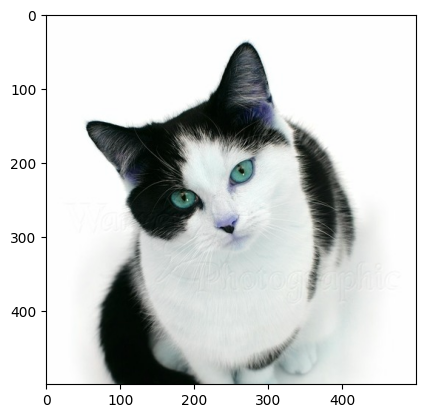

In [16]:
cat = cv2.imread('data/cat.png')
plt.imshow(cat)
plt.show()

### Colors seem to be incorrect. This happens because opencv by default stores images as BGR, not RGB.
There is a special function for converting the colors:

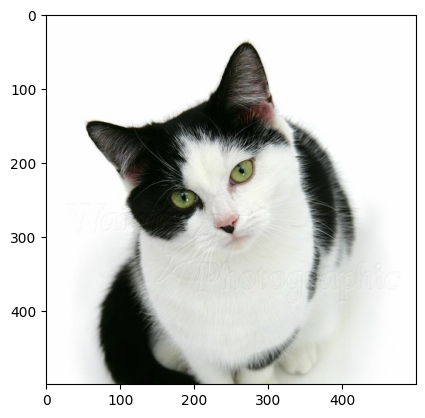

In [17]:
cat_rgb = cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)
plt.imshow(cat_rgb)
plt.show()

Image is stored as 3-d array: (H, W, C), C -- channels. For RGB image there are 3 channels: R, G, B.

In [18]:
cat.shape

(500, 500, 3)

So, actually, to turn BGR image to RGB we may just inverse order of channels:

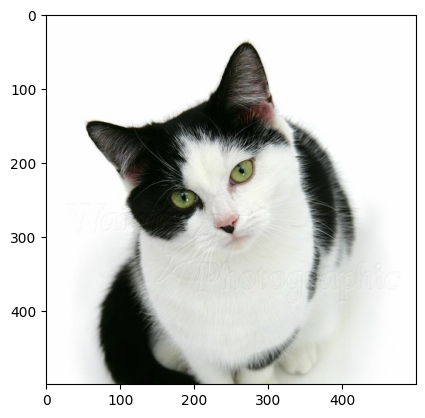

In [19]:
cat_rgb2 = cat[:,:,::-1]
plt.imshow(cat_rgb2)
plt.show()

Classical computer vision algorithms often work with grayscale image, so, let us convert image to grayscale:

(500, 500)


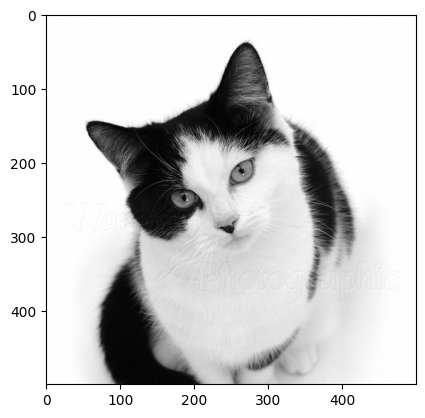

In [20]:
cat_gray = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
print(cat_gray.shape)
plt.imshow(cat_gray, cmap='gray')
plt.show()

Sometimes we may select some parts of the image according to some criteria, then selected parts may be stored in binary image which contains 0 or 1:

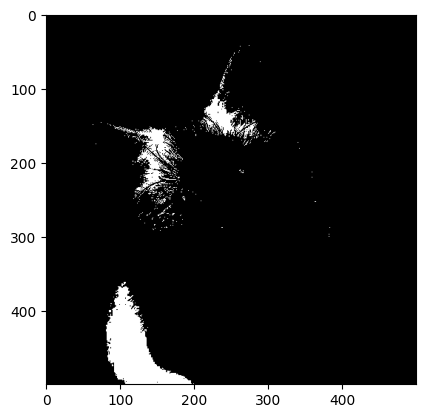

In [21]:
cat_bin = cat_gray < 10
plt.imshow(cat_bin, cmap='gray')
plt.show()

In [22]:
def get_kernel(n):
    # Let's define our kernel size
    kernel = np.zeros((n,n), np.uint8)
    kernel = cv2.circle(kernel, (n//2, n//2), n//2, 1, -1)
    return kernel    

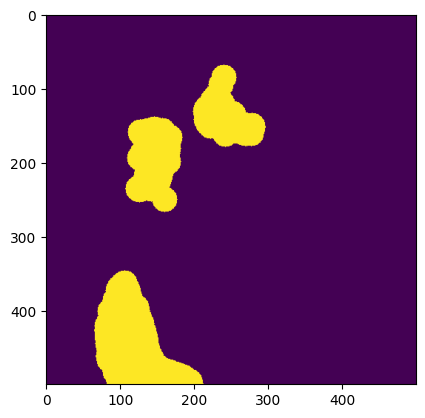

In [23]:
# Now we erode
cat_2 = cv2.erode(cat_bin.astype(np.uint8), get_kernel(3))
cat_2 = cv2.dilate(cat_2.astype(np.uint8), get_kernel(35))
plt.imshow(cat_2)
plt.show()

4


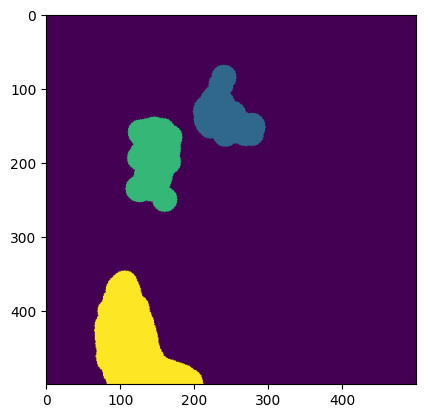

In [24]:
info, component_map = cv2.connectedComponents(cat_2.astype(np.uint8))
print(info)
plt.imshow(component_map)
plt.show()

## Task: Write a function to calculate how many red circles are there on the image (3 points).

In [25]:
W, H = 1000, 1000
img = np.ones((H, W, 3)) * 255
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]
for i in range(100):
    ok = False
    while not ok:
        x, y = np.random.randint(0, 1000, 2)
        min_r = min([50, x, y, W - x, H - y])
        if min_r <= 10:
            continue
        r = np.random.randint(10, min_r)
        c = colors[np.random.randint(3)]
        m = img[y - r : y + r + 1, x - r : x + r + 1]
        mask = np.ones_like(m) * 255
        cv2.circle(mask, (r, r), r, 0, -1)
        if (m[mask > 0] == 255).all():
            ok = True
            img = cv2.circle(img, (x, y), r, c, -1)
#plt.imshow(img)

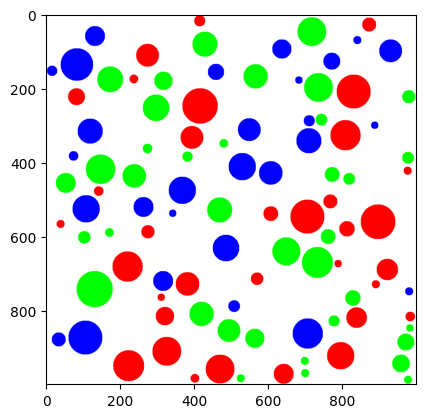

In [26]:
img_rgb = cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

In [27]:
def count_red_circles(img):
    red = np.array([0, 0, 255])
    mask = cv2.inRange(img, red, red)
    return cv2.connectedComponents(mask)


red_circles, components = count_red_circles(img)
print(f"Red circles: {red_circles}")

Red circles: 35


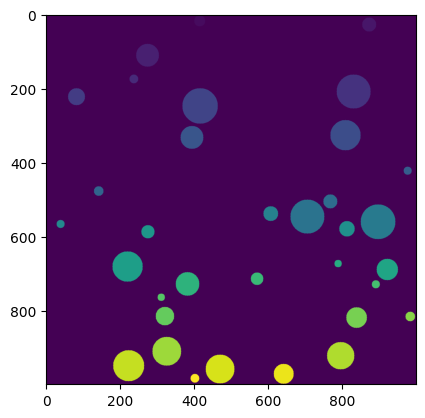

In [28]:
plt.imshow(components)
plt.show()

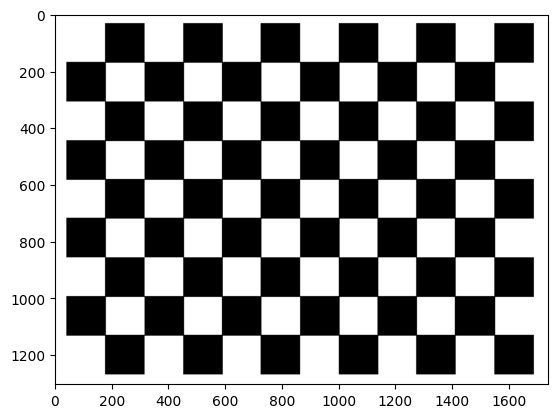

In [29]:
img = cv2.imread('data/board.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

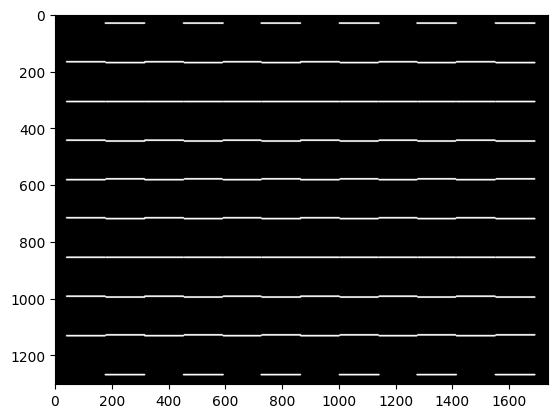

In [30]:
gray = abs(img[1:].astype(float) - img[:-1].astype(float))
gray = cv2.dilate(gray.astype(np.uint8), get_kernel(5))
plt.imshow(gray>0, cmap='gray')
plt.show()

In [31]:
# It contains code with geometrical functions to calculate distance between lines:
from remove_similar_lines import remove_similar_lines

def detect_lines(gray, threshold=10, min_line_length=1000, max_line_gap=100):
    """
    Detects lines on the image using Hough transform.
    """
    blurred = (cv2.GaussianBlur(gray, (3, 3), 0) > 0).astype(np.uint8)
    lines = cv2.HoughLinesP(blurred, 
                            rho=1, 
                            theta=np.pi/180, 
                            threshold=100,
                            minLineLength=min_line_length,
                            maxLineGap=max_line_gap)
    
    image_with_lines = np.zeros_like(gray)
    # This function calculates paiwise distances between lines and removes ones which are close to each other.
    lines = remove_similar_lines([l[0] for l in lines])
    
    # Draw found lines:
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line
            cv2.line(image_with_lines, (x1, y1), (x2, y2), 255, 2)
    
    return image_with_lines, lines

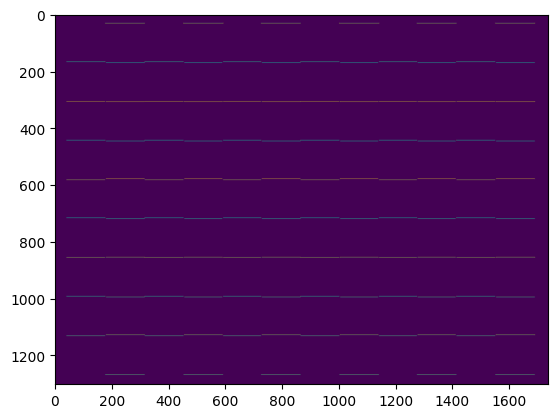

In [32]:
grad_y = abs(img[1:] - img[:-1])
plt.imshow(grad_y)
plt.show()

Lines found: 8


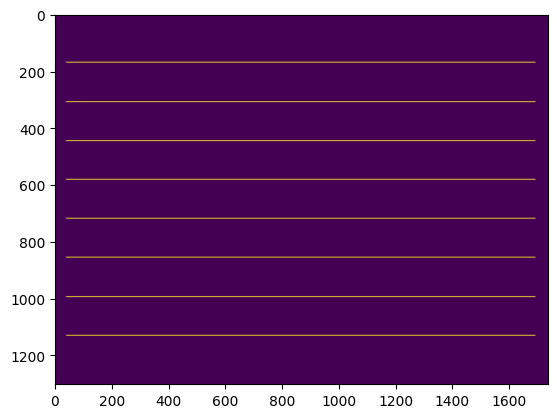

In [33]:
result_image, lines = detect_lines(grad_y)
print(f"Lines found: {len(lines) if lines is not None else 0}")
plt.imshow(result_image)
plt.show()

## Task: Color all black cells in even rows with green (5 points).

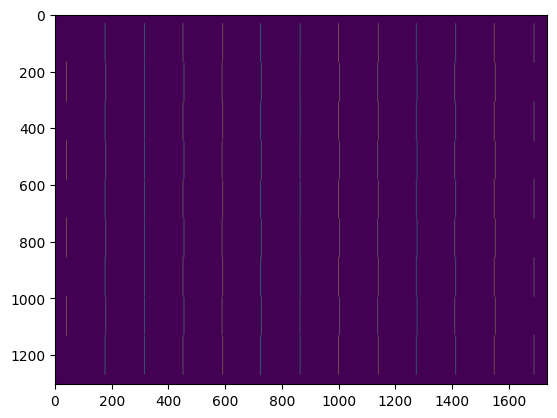

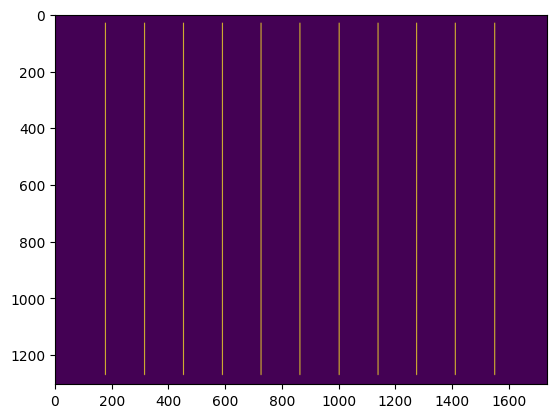

In [34]:
grad_x = abs(img[:, 1:] - img[:, :-1])
plt.imshow(grad_x)
plt.show()

result_image_vertical, v_lines = detect_lines(grad_x)
plt.imshow(result_image_vertical)
plt.show()

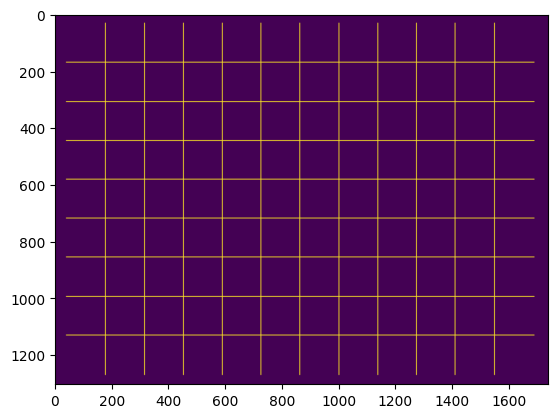

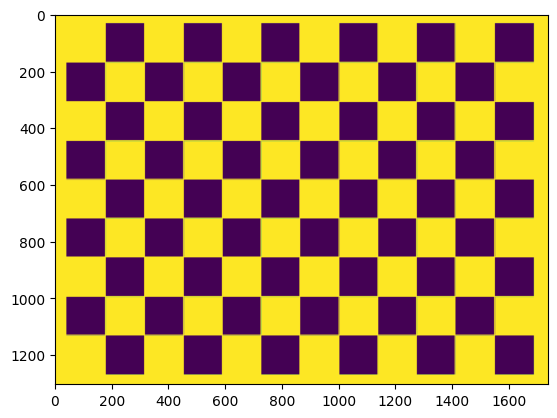

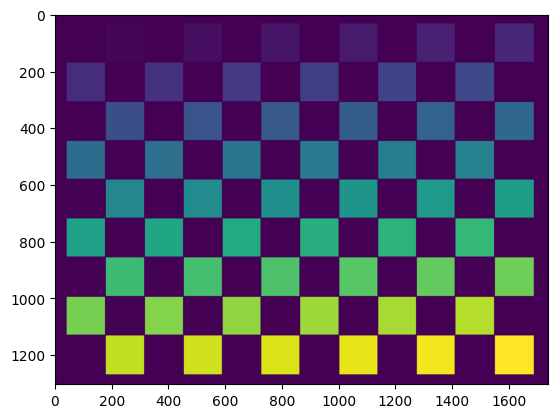

[np.float64(100.0), np.float64(238.5), np.float64(376.5), np.float64(513.0), np.float64(649.5), np.float64(786.5), np.float64(924.5), np.float64(1062.0), np.float64(1200.0)]


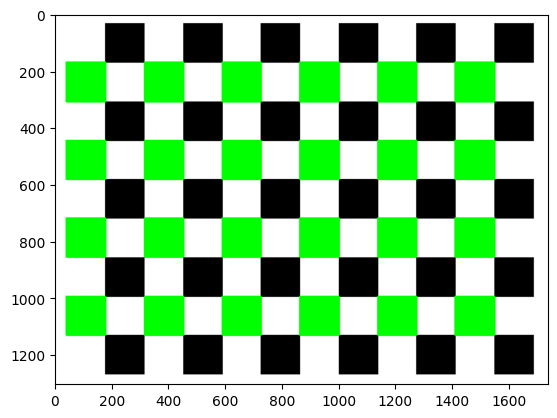

In [43]:
def recolor_even_rows(img):
    vertical_diff = abs(img[:, 1:] - img[:, :-1])
    vertical_diff_padded = np.hstack([vertical_diff, vertical_diff[:, -1][:, np.newaxis]])
    vertical_lines, _ = detect_lines(vertical_diff_padded)
    
    horizontal_diff = abs(img[1:] - img[:-1])
    horizontal_diff_padded = np.vstack([horizontal_diff, horizontal_diff[-1:, :]])
    horizontal_lines, _ = detect_lines(horizontal_diff_padded)
    
    image_with_lines = vertical_lines + horizontal_lines
   
    plt.imshow(image_with_lines)
    plt.show()

    
    img_overlay = img.copy()
    img_overlay[image_with_lines > 0] = 255

    plt.imshow(img_overlay)
    plt.show()

    binary_img = (img_overlay == 0).astype(np.uint8)
    n_black_cells, component_map = cv2.connectedComponents(binary_img) 

    plt.imshow(component_map)
    plt.show()

    img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    # for each component calculate avg height 

    heights = []
    for i in range(1, n_black_cells):
        ys, xs = np.where(component_map == i)
        heights.append(np.mean(ys))

    # range of error
    error = 10
    heights = sorted(heights)

    real_heights = [heights[0]]
    for i in range(1, len(heights)):
        if heights[i] - real_heights[-1] >= error:
            real_heights.append(heights[i])

    print(real_heights)

    for i in range(1, n_black_cells):
        ys, xs = np.where(component_map == i)
        avg_y = np.mean(ys)
        # find closest height in real_heights
        closest_height = min(real_heights, key=lambda x: abs(x - avg_y))
        
        row_index = real_heights.index(closest_height)
    
        # Paint green if it's an even chessboard row
        if row_index % 2 == 1:
            img_rgb[ys, xs] = [0, 255, 0]

    # because we painted white some of the black lines
    # make the green squares bigger

    green_mask = np.all(img_rgb == [0, 255, 0], axis=2).astype(np.uint8)
    # 10 pixels of error, maybe too much, idk
    dilated_mask = cv2.dilate(green_mask, get_kernel(10), iterations=1)

    # Apply the dilated mask to RGB image
    img_rgb[dilated_mask > 0] = [0, 255, 0]
    return img_rgb

recolored_image = recolor_even_rows(img)

plt.imshow(recolored_image)
plt.show()

Close enough, now the problem is recovering where we made the lines white, maybe by chosing if distance < range_of_error

## Image classification

In [36]:
day_imgs = []
night_imgs = []
for fn in glob('data/day*'):
    day_imgs.append(cv2.imread(fn, cv2.IMREAD_GRAYSCALE))
for fn in glob('data/night*'):
    night_imgs.append(cv2.imread(fn, cv2.IMREAD_GRAYSCALE))

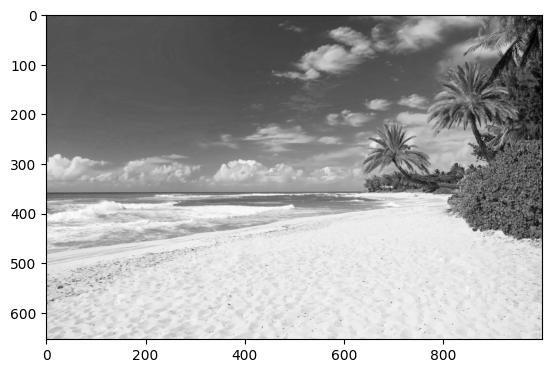

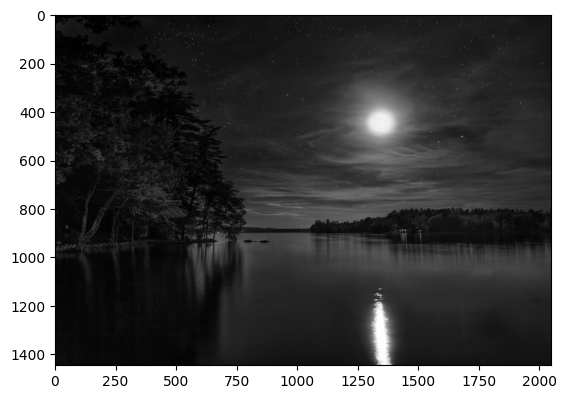

In [37]:
plt.imshow(day_imgs[0], cmap='gray')
plt.show()
plt.imshow(night_imgs[0], cmap='gray')
plt.show()

#### Here we may find features to be used for classification.

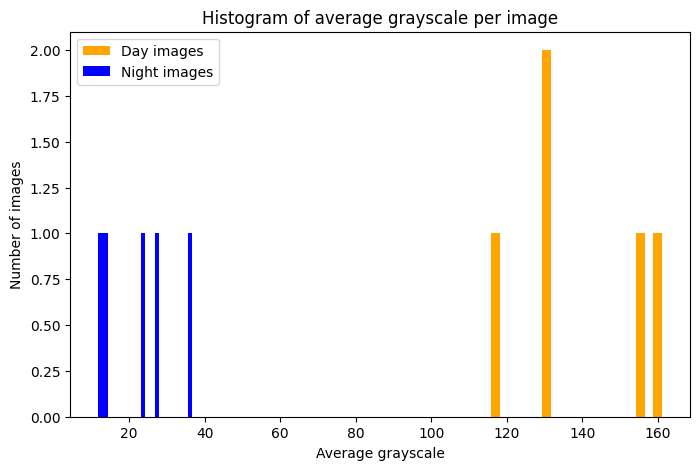

In [38]:
# Compute average grayscale per image
day_avgs = [np.mean(img) for img in day_imgs]
night_avgs = [np.mean(img) for img in night_imgs]

plt.figure(figsize=(8,5))
plt.hist(day_avgs, bins=20, label='Day images', color='orange')
plt.hist(night_avgs, bins=20, label='Night images', color='blue')
plt.xlabel('Average grayscale')
plt.ylabel('Number of images')
plt.title('Histogram of average grayscale per image')
plt.legend()
plt.show()
